In [2]:
import numpy as np
import matplotlib.pyplot as plt

Define class of single neuron

In [3]:
class Neuron:
    
    def __init__(self, x, labels, w): # A neuron can be unambigiously defined as a vector of weight
                                      # Vector of weights is (w_0, w_1, ... w_n), where n-1 is dimension of input
                                      # and w_0 is bias.
        self.x = x # But our class will also have set of input and labels as attributes
        self.labels = labels 
        self.w = w
    
    def summ(self, w, x): # The "Heart" of neuron which calculates the activation finction
                          # We'll call it summ as it is practically a summator
        res = w[0]        
        for i in range(1, len(w)): 
            res += w[i]*x[i-1]
        return res
    
    def sign(self, val):
        return -1 if val<=0 else 1
    
    def col(self, i):
        return 'blue' if self.labels[i] == 1 else 'red'
    
    def x1(self, x):
        return -1*(self.w[0] + self.w[1]*x)/self.w[2]
    
    def learn(self):
        N = 100
        alpha = 0.1 # Learning rate
        for i in range(N):
            mismatch = 0
            for j in range(len(self.x)):
                y = self.sign(self.summ(self.w, self.x[j]))
                if y * self.labels[j] < 0:
                    mismatch = 1
                    self.w[0] += alpha * self.labels[j]
                    for i in range(1, len(self.w)):
                        self.w[i] += alpha*self.labels[j]*self.x[j][i-1]
                    
            if mismatch == 0:
                print('Learning complete on', i, '-th step.')
                x0 = []; x1 = []
                try:
                    for i in range(len(self.x)):
                        x0.append(self.x[i][0])
                        plt.scatter(self.x[i][0], self.x[i][1], color = self.col(i))
                    plt.plot(x0, [self.x1(x) for x in x0])
                    print('\n \n \t Blue - ones, red - zeros')
                except IndexError:
                    print(self.w)
                break
                
    def output(self, x_input): # Output function which will give out zero or one
                               # as we are working with logical operations
        return 1 if \
    self.sign(self.summ(self.w, x_input)) == 1 else 0

    
    

Our first neuron will find learn to do logical AND. 

Learning complete on 4 -th step.

 
 	 Blue - ones, red - zeros


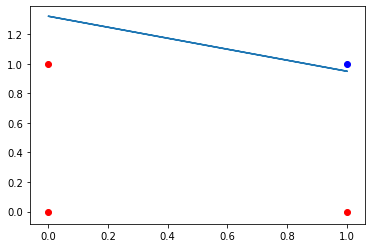

In [6]:
x_1 = np.array([[1, 1]]) # where label is 1
x_0 = np.array([[0, 0], [0, 1], [1, 0]]) # where label is 0

n_and = Neuron(np.concatenate((x_1, x_0)), np.concatenate((np.ones(x_1.shape[0]), -1*np.ones(x_0.shape[0]))), np.random.rand(3))
n_and.learn()

So basically we find such weigths that line defined by function
$$ x_{1} = \frac{-(w_{0} + w_{1} x_{0})}{w_{2}}$$
will devide input set into two sets, one of which belogns to label 1 and other to label 0

The second neuron will learn logical OR

Learning complete on 10 -th step.

 
 	 Blue - ones, red - zeros


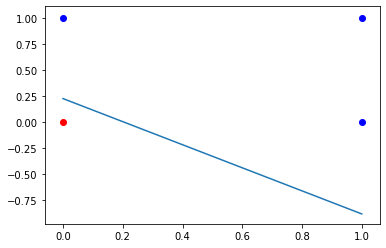

In [16]:
x_1 = np.array([[1, 1], [1, 0], [0, 1]]) # label 1
x_0 = np.array([[0, 0]]) # label 0
n_or = Neuron(np.concatenate((x_1, x_0)), np.concatenate((np.ones(x_1.shape[0]), -1*np.ones(x_0.shape[0]))), np.random.rand(3))
n_or.learn()

It's known that operation of logical XOR (exclusive or) principally can not be implemented by one neuron as sets of zeros and ones of this operation can not be linearly divided.

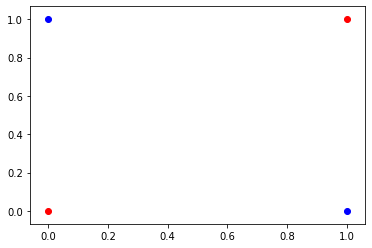

In [15]:
def col(i):
    return 'blue' if labels[i] == 1 else 'red'
x_1 = np.array([[1, 1], [1, 0], [0, 1]]) # label 1
x_0 = np.array([[0, 0]]) # label 0
x_1 = np.array([[1, 0], [0, 1]]) # label 1
x_0 = np.array([[0, 0], [1, 1]]) # label 0
x = np.concatenate((x_1, x_0))
labels = np.concatenate((np.ones(x_1.shape[0]), -1*np.ones(x_0.shape[0])))
for i in range(len(x)):
    plt.scatter(x[i][0], x[i][1], color = col(i))

But we are still going to implement it by inputting the outputs of AND-neuron and OR-neuron into another OR-neuron, i.e. implement mainterm form of XOR:
$$ \bar{x} \cdot y + x \cdot \bar{y} $$

But we are also going to need a NOT-neuron

In [17]:
x_not = np.array([[0], [1]])
labels_not = np.array([1, -1])

In [18]:
n_not = Neuron(x_not, labels_not, np.random.rand(2))

In [19]:
n_not.learn()

Learning complete on 5 -th step.
[ 0.11904823 -0.26721402]


In [20]:
n_not.output([1])

0

In [21]:
def prepare_for_xor(x):
    x_xor = np.empty(x.shape)
    for i in range(len(x)):
        x_xor[i] = [n_and.output([n_not.output([x[i][0]]), x[i][1]]), \
                n_and.output([x[i][0], n_not.output([x[i][1]])])]
    return x_xor

In x_xor we have changed x, i.e. 
$$ \bar{x_{0}} \cdot x_{1} $$
and
$$ x_{0} \cdot \bar{x_{1}} $$

In [24]:
x_xor = prepare_for_xor(x)

Now we use it as input into OR-neuron 

Learning complete on 3 -th step.

 
 	 Blue - ones, red - zeros


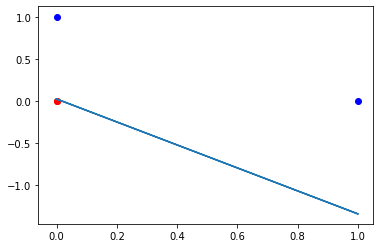

In [25]:
n_xor = Neuron(x_xor, labels, np.random.rand(3))
n_xor.learn()

Notice that we used trained neurons. And the number of points is now three because in x_xor we already had changed x, which contained the following points:

In [26]:
x_xor

array([[0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.]])

And just like that we have built and trained our own neural network!